In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
import pandas as pd
import warnings
# warnings.filterwarnings("ignore")

data = pd.read_csv('heart.csv')

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:13], data[["target"]], train_size=.8)



model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5,n_jobs=-1)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.9295774647887323


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# y_train

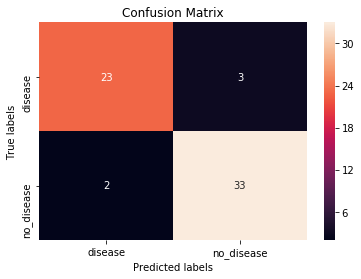

In [30]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(y_test, model.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['disease', 'no_disease']); ax.yaxis.set_ticklabels(['disease', 'no_disease']);

In [10]:
scores = model.predict_proba(X_test)

In [11]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

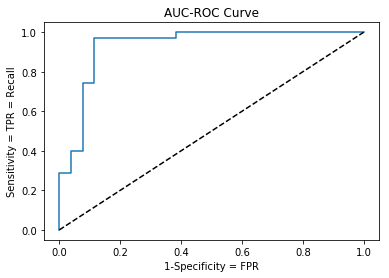

In [13]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity = FPR')
plt.ylabel("Sensitivity = TPR = Recall")
plt.title("AUC-ROC Curve")
plt.show()

In [14]:
roc_auc

0.9318681318681319

In [157]:
# scores

In [158]:
# model.predict(X_test)

In [159]:
# thresholds